# Portfolio Optimization and Efficient Frontier

## Overview
This notebook focuses on portfolio optimization techniques to maximize returns and minimize risk. Using historical data of selected assets, we calculate expected returns, volatilities, and correlations to construct the **efficient frontier**.  

## Objectives
- Calculate the **mean returns** and **covariance matrix** of assets.  
- Simulate multiple portfolios with varying weights.  
- Compute **risk-return profiles** for each portfolio.  
- Identify the **optimal portfolios** based on **Sharpe Ratio** and **minimum risk**.  
- Visualize the **efficient frontier** to provide insights for investment decisions.

## Tools & Methods
- Python libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`.  
- Key financial metrics: **Expected return**, **Volatility**, **Sharpe Ratio**.  
- Portfolio theory: **Markowitz mean-variance optimization**.

> This notebook is part of my **Finance Data Analysis Portfolio**, showcasing practical skills in investment analysis and risk management.

###1. Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

###2. Cargar dataset limpio

In [2]:
df = pd.read_csv("market_data_clean.csv", parse_dates=["Date"])
df.head()

,Date,MXN_Close,GSPC_Close,IXIC_Close,MXX_Close,MXN_High,GSPC_High,IXIC_High,MXX_High,MXN_Low,...,IXIC_Low,MXX_Low,MXN_Open,GSPC_Open,IXIC_Open,MXX_Open,MXN_Volume,GSPC_Volume,IXIC_Volume,MXX_Volume
0,2015-01-01,14.75279,NaN,NaN,NaN,14.75790,NaN,NaN,NaN,14.68000,...,NaN,NaN,14.73216,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2015-01-02,14.82043,2058.199951,4726.810059,42115.468750,14.86300,2072.360107,4777.009766,43325.429688,14.75279,...,4698.109863,41989.648438,14.75279,2058.899902,4760.240234,43146.519531,0.0,2.708700e+09,1.435150e+09,111168800.0
2,2015-01-05,14.93942,2020.579956,4652.569824,41099.371094,14.98250,2054.439941,4702.770020,42147.960938,14.82496,...,4641.459961,40824.929688,14.84360,2054.439941,4700.339844,42134.660156,0.0,3.799120e+09,1.794470e+09,219712500.0
3,2015-01-06,14.89467,2002.609985,4592.740234,41329.410156,14.98967,2030.250000,4667.330078,41456.621094,14.81800,...,4567.589844,40723.660156,14.93784,2022.150024,4666.850098,41101.011719,0.0,4.460110e+09,2.167320e+09,212475500.0
4,2015-01-07,14.71020,2025.900024,4650.470215,41813.929688,14.91380,2029.609985,4652.720215,41963.949219,14.69779,...,4613.899902,41331.121094,14.89469,2005.550049,4626.839844,41331.121094,0.0,3.805480e+09,1.957950e+09,184571000.0


###3. Seleccionar columnas de cierre y calcular retornos

In [3]:
close_cols = ["MXN_Close", "GSPC_Close", "IXIC_Close", "MXX_Close"]

returns = df.set_index("Date")[close_cols].pct_change().dropna()
returns.head()

/tmp/ipython-input-1533439398.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.set_index("Date")[close_cols].pct_change().dropna()


,MXN_Close,GSPC_Close,IXIC_Close,MXX_Close
Date,,,,
2015-01-05,0.008029,-0.018278,-0.015706,-0.024126
2015-01-06,-0.002995,-0.008893,-0.012859,0.005597
2015-01-07,-0.012385,0.011630,0.012570,0.011723
2015-01-08,-0.003297,0.017888,0.018432,0.014071
2015-01-09,-0.004626,-0.008404,-0.006782,-0.000469


###4. Simulación de portafolios

In [4]:
num_portfolios = 5000
results = np.zeros((num_portfolios, 3 + len(close_cols)))

for i in range(num_portfolios):
    weights = np.random.random(len(close_cols))
    weights /= np.sum(weights)

    port_return = np.sum(returns.mean() * weights) * 252
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = port_return / port_volatility

    results[i, 0] = port_return
    results[i, 1] = port_volatility
    results[i, 2] = sharpe_ratio
    results[i, 3:] = weights

###5. Convertir resultados a dataframe

In [5]:
columns = ["Return", "Volatility", "Sharpe"] + [f"{col}_weight" for col in close_cols]
portfolios = pd.DataFrame(results, columns=columns)

portfolios.head()

,Return,Volatility,Sharpe,MXN_Close_weight,GSPC_Close_weight,IXIC_Close_weight,MXX_Close_weight
0,0.091630,0.119146,0.769061,0.256901,0.278708,0.242704,0.221687
1,0.088443,0.118708,0.745050,0.230517,0.394446,0.136154,0.238883
2,0.067968,0.094086,0.722404,0.524935,0.087545,0.215148,0.172372
3,0.086479,0.113070,0.764827,0.327066,0.467650,0.093417,0.111866
4,0.079884,0.110478,0.723080,0.255721,0.293280,0.131097,0.319902


###6. Identificar el portafolio con Sharpe Máximo y el de mínima volatilidad

In [6]:
max_sharpe = portfolios.loc[portfolios["Sharpe"].idxmax()]
min_vol = portfolios.loc[portfolios["Volatility"].idxmin()]

max_sharpe, min_vol

(Return               0.107386
 Volatility           0.131068
 Sharpe               0.819310
 MXN_Close_weight     0.365034
 GSPC_Close_weight    0.027520
 IXIC_Close_weight    0.561685
 MXX_Close_weight     0.045762
 Name: 1752, dtype: float64,
 Return               0.050787
 Volatility           0.086139
 Sharpe               0.589597
 MXN_Close_weight     0.549692
 GSPC_Close_weight    0.193227
 IXIC_Close_weight    0.004208
 MXX_Close_weight     0.252872
 Name: 2513, dtype: float64)

###7. Frontera eficiente

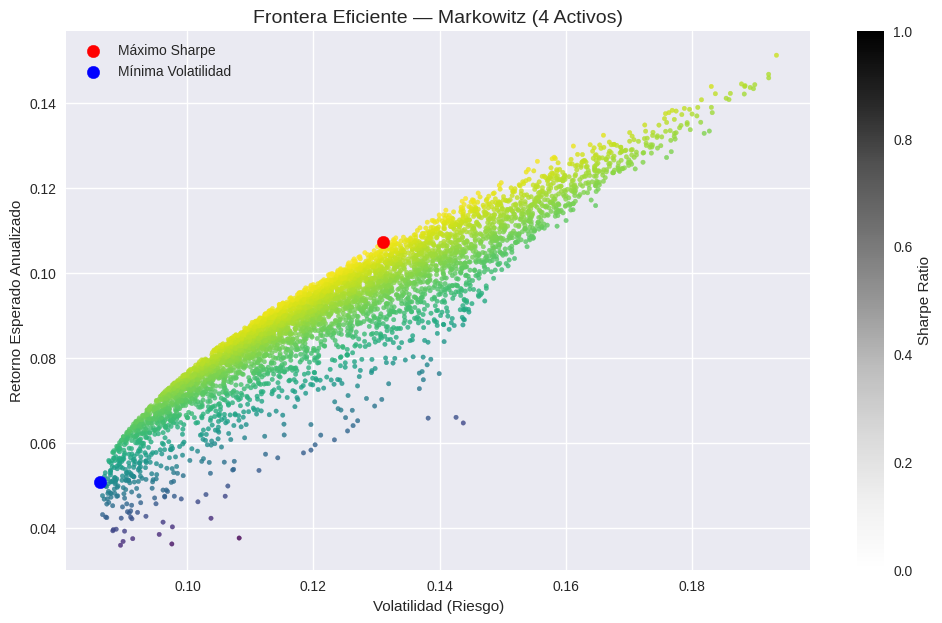

In [7]:
plt.figure(figsize=(12, 7))

plt.scatter(
    portfolios["Volatility"],
    portfolios["Return"],
    c=portfolios["Sharpe"],
    cmap="viridis",
    s=10,
    alpha=0.8
)

# Portafolio de Máximo Sharpe
plt.scatter(
    max_sharpe["Volatility"],
    max_sharpe["Return"],
    c="red",
    s=80,
    label="Máximo Sharpe"
)

# Portafolio de Mínima Volatilidad
plt.scatter(
    min_vol["Volatility"],
    min_vol["Return"],
    c="blue",
    s=80,
    label="Mínima Volatilidad"
)

plt.title("Frontera Eficiente — Markowitz (4 Activos)", fontsize=14)
plt.xlabel("Volatilidad (Riesgo)")
plt.ylabel("Retorno Esperado Anualizado")
plt.colorbar(label="Sharpe Ratio")
plt.legend()
plt.grid(True)

plt.show()

###8. Pesos óptimos

In [8]:
print("📌 Portafolio con Máximo Sharpe Ratio\n")
for asset, weight in zip(close_cols, max_sharpe[3:]):
    print(f"{asset}: {weight:.2%}")

print("\n📌 Portafolio con Mínima Volatilidad\n")
for asset, weight in zip(close_cols, min_vol[3:]):
    print(f"{asset}: {weight:.2%}")

📌 Portafolio con Máximo Sharpe Ratio

MXN_Close: 36.50%
GSPC_Close: 2.75%
IXIC_Close: 56.17%
MXX_Close: 4.58%

📌 Portafolio con Mínima Volatilidad

MXN_Close: 54.97%
GSPC_Close: 19.32%
IXIC_Close: 0.42%
MXX_Close: 25.29%


In [9]:
portfolios.to_csv("simulated_portfolios.csv", index=False)